In [1]:
# Beginning notebook
# Import dependancies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from matplotlib import rc
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
raw_df = pd.read_csv("./edited_dataset.csv") # Call in csv data
raw_df['final_total'] = raw_df['score_home'] + raw_df['score_away'] # Create new columns
raw_df['True Spread']=0 # Create new columns
raw_df['Spread Outcome'] = 0 # Create new columns
raw_df['Total Outcome'] = 0 # Create new columns

# Rename all columns
raw_df = raw_df.rename(columns = {'schedule_date':'Date', 'schedule_season':'Season', 'schedule_week':'Week',
                                  'schedule_playoff':'Playoff Game', 'team_home':'Home Team','score_home':'Home Final',
                                  'score_away':'Away Final','team_away':'Away Team', 'team_favorite_id':'Favorite',
                                  'spread_favorite':'Spread', 'over_under_line':'Over/Under', 'stadium':'Location',
                                  'stadium_neutral':'Neutral Site','weather_temperature':'Temperature','weather_wind_mph':'Wind(MPH)',
                                  'weather_humidity':'Humidity', 'weather_detail':'Location Detail','final_total':'Total'
                                  
                                 })
# Reorder all columns
raw_df = raw_df[['Date', 'Season','Week','Playoff Game','Home Team','Home Final','True Spread','Away Final','Away Team',
                'Favorite','Spread','Over/Under','Total','Spread Outcome','Total Outcome','Location','Neutral Site','Temperature','Wind(MPH)','Humidity',
                'Location Detail']]

In [3]:
# Convert all home team column values to acronym to match favorite column
home_replaced = raw_df.replace({'Home Team' : {'New Orleans Saints':'NO', 'Miami Dolphins':'MIA','Chicago Bears':'CHI',
                                        'Buffalo Bills':'BUF','Houston Texans':'HOU', 'Jacksonville Jaguars':'JAX', 
                                        'New England Patriots':'NE','New York Giants':'NYG','Philadelphia Eagles':'PHI',
                                       'Pittsburgh Steelers':'PIT', 'Seattle Seahawks':'SEA','St. Louis Rams':'LAR',
                                       'Tampa Bay Buccaneers':'TB','Tennessee Titans':'TEN','Washington Redskins':'WAS',
                                       'Kansas City Chiefs':'KC','New York Jets':'NYJ','Atlanta Falcons':'ATL',
                                       'Carolina Panthers':'CAR','Cincinnati Bengals':'CIN','Cleveland Browns':'CLE',
                                       'Dallas Cowboys':'DAL','Denver Broncos':'DEN','Detroit Lions':'DET','Green Bay Packers':
                                       'GB','Indianapolis Colts':'IND','Minnesota Vikings':'MIN','Oakland Raiders':'OAK',
                                       'San Diego Chargers':'LAC','San Francisco 49ers':'SF','Arizona Cardinals':'ARI',
                                       'Baltimore Ravens':'BAL','Miami Dolphins':'MIA','Los Angeles Rams':'LAR',
                                       'Los Angeles Chargers':'LAC'}})

# Convert all away team column values to acronym to match favorite column
new_df = home_replaced.replace({'Away Team' : {'New Orleans Saints':'NO', 'Miami Dolphins':'MIA','Chicago Bears':'CHI',
                                        'Buffalo Bills':'BUF','Houston Texans':'HOU', 'Jacksonville Jaguars':'JAX', 
                                        'New England Patriots':'NE','New York Giants':'NYG','Philadelphia Eagles':'PHI',
                                       'Pittsburgh Steelers':'PIT', 'Seattle Seahawks':'SEA','St. Louis Rams':'LAR',
                                       'Tampa Bay Buccaneers':'TB','Tennessee Titans':'TEN','Washington Redskins':'WAS',
                                       'Kansas City Chiefs':'KC','New York Jets':'NYJ','Atlanta Falcons':'ATL',
                                       'Carolina Panthers':'CAR','Cincinnati Bengals':'CIN','Cleveland Browns':'CLE',
                                       'Dallas Cowboys':'DAL','Denver Broncos':'DEN','Detroit Lions':'DET','Green Bay Packers':
                                       'GB','Indianapolis Colts':'IND','Minnesota Vikings':'MIN','Oakland Raiders':'OAK',
                                       'San Diego Chargers':'LAC','San Francisco 49ers':'SF','Arizona Cardinals':'ARI',
                                       'Baltimore Ravens':'BAL','Miami Dolphins':'MIA','Los Angeles Rams':'LAR',
                                       'Los Angeles Chargers':'LAC'}})


In [4]:
# Solving for if the favorite covered
# Base function for outcome output
def func(row):
    if row['Favorite'] == row['Home Team']:
        return row['Home Final'] + row['Spread'] - row['Away Final']
    else:
        return row['Away Final'] + row['Spread'] - row['Home Final']
        
new_df['True Spread'] = new_df.apply(func, axis=1)

In [5]:
# Function to populate outcome in spread outcome column
def spread(row):
    if row['True Spread'] > 0:
        return "FAV"
    elif row['True Spread'] < 0:
        return "DOG"
    else:
        return "PUSH"

new_df['Spread Outcome'] = new_df.apply(spread, axis=1)

In [6]:
# Function to populate outcome total column
def total(row):
    if row['Total'] < row['Over/Under']:
        return "UNDER"
    elif row['Total'] > row['Over/Under']:
        return "OVER"
    else:
        return "PUSH"

new_df['Total Outcome'] = new_df.apply(total, axis=1)
final_df = pd.DataFrame(new_df)

In [7]:
# Print final dataframe
#final_df.head()

In [8]:
# Reducing the number of columns to include only relevant ones
reduced_df = final_df[['Date', 'Season','Week','Playoff Game','Home Team','Home Final','True Spread','Away Final','Away Team',
                'Favorite','Spread','Over/Under','Total','Spread Outcome','Total Outcome']]
reduced_df.head()

,Date,Season,Week,Playoff Game,Home Team,Home Final,True Spread,Away Final,Away Team,Favorite,Spread,Over/Under,Total,Spread Outcome,Total Outcome
0,9/9/2010,2010,1,False,NO,14,0.0,9,MIN,NO,-5.0,49.5,23,PUSH,UNDER
1,9/12/2010,2010,1,False,BUF,10,2.0,15,MIA,MIA,-3.0,39.0,25,FAV,UNDER
2,9/12/2010,2010,1,False,CHI,19,-1.5,14,DET,CHI,-6.5,45.0,33,DOG,UNDER
3,9/12/2010,2010,1,False,HOU,34,-11.0,24,IND,IND,-1.0,48.0,58,DOG,OVER
4,9/12/2010,2010,1,False,JAX,24,4.0,17,DEN,JAX,-3.0,41.5,41,FAV,UNDER


In [9]:
# Creating divisons and checking for divisional matchups (if home and away team are in same division)
def naming(row):
    if row['Home Team'] in ['CHI','GB','DET','MIN'] and row['Away Team'] in  ['CHI','GB','DET','MIN']:
        return True
    elif row['Home Team'] in ['DAL','PHI','NYG','WAS'] and row['Away Team'] in  ['DAL','PHI','NYG','WAS']:
        return True
    elif row['Home Team'] in ['LAR','SF','SEA','ARI'] and row['Away Team'] in  ['LAR','SF','SEA','ARI']:
        return True
    elif row['Home Team'] in ['NO','TB','ATL','CAR'] and row['Away Team'] in ['NO','TB','ATL','CAR']:
        return True
    elif row['Home Team'] in ['NE','BUF','MIA','NYJ'] and row['Away Team'] in  ['NE','BUF','MIA','NYJ']:
        return True
    elif row['Home Team'] in ['KC','OAK','LAC','DEN'] and row['Away Team'] in  ['KC','OAK','LAC','DEN']:
        return True
    elif row['Home Team'] in ['BAL','CLE','PIT','CIN'] and row['Away Team'] in  ['BAL','CLE','PIT','CIN']:
        return True
    elif row['Home Team'] in ['HOU','IND','JAX','TEN'] and row['Away Team'] in  ['HOU','IND','JAX','TEN']:
        return True

In [10]:
# Apply function
reduced_df['Divisional Matchup'] = reduced_df.apply(naming, 1)

C:\Users\marcg\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
# Check for new column
reduced_df.head()

,Date,Season,Week,Playoff Game,Home Team,Home Final,True Spread,Away Final,Away Team,Favorite,Spread,Over/Under,Total,Spread Outcome,Total Outcome,Divisional Matchup
0,9/9/2010,2010,1,False,NO,14,0.0,9,MIN,NO,-5.0,49.5,23,PUSH,UNDER,None
1,9/12/2010,2010,1,False,BUF,10,2.0,15,MIA,MIA,-3.0,39.0,25,FAV,UNDER,True
2,9/12/2010,2010,1,False,CHI,19,-1.5,14,DET,CHI,-6.5,45.0,33,DOG,UNDER,True
3,9/12/2010,2010,1,False,HOU,34,-11.0,24,IND,IND,-1.0,48.0,58,DOG,OVER,True
4,9/12/2010,2010,1,False,JAX,24,4.0,17,DEN,JAX,-3.0,41.5,41,FAV,UNDER,None


In [12]:
# Use loc function to isolate only rows where divisional matchups occurred
divisional_df = reduced_df.loc[reduced_df['Divisional Matchup'] == True] 
divisional_df.head()


,Date,Season,Week,Playoff Game,Home Team,Home Final,True Spread,Away Final,Away Team,Favorite,Spread,Over/Under,Total,Spread Outcome,Total Outcome,Divisional Matchup
1,9/12/2010,2010,1,False,BUF,10,2.0,15,MIA,MIA,-3.0,39.0,25,FAV,UNDER,True
2,9/12/2010,2010,1,False,CHI,19,-1.5,14,DET,CHI,-6.5,45.0,33,DOG,UNDER,True
3,9/12/2010,2010,1,False,HOU,34,-11.0,24,IND,IND,-1.0,48.0,58,DOG,OVER,True
9,9/12/2010,2010,1,False,SEA,31,-28.0,6,SF,SF,-3.0,37.0,37,DOG,PUSH,True
10,9/12/2010,2010,1,False,LAR,13,1.0,17,ARI,ARI,-3.0,39.5,30,FAV,UNDER,True


In [13]:
# Honestly this was just me getting a feel for the data so I could determine how to bin the spreads and totals
avg_spread = divisional_df['Spread'].mean()
highest_spread = divisional_df['Spread'].min()
std_dev_spread = np.std(divisional_df['Spread'])
biggest_win = divisional_df['True Spread'].min()
avg_against_spread = divisional_df['True Spread'].mean()
highest_total = divisional_df['Over/Under'].max()
lowest_total = divisional_df['Over/Under'].min()

print(f'Average spread: {avg_spread}')
print(f'Highest spread: {highest_spread}')
print(f'Standard Deviation of spread: {std_dev_spread}')
print(f'Average score against the spread: {avg_against_spread}')
print(f'Biggest win against the spread: {biggest_win}')
print(f'Highest Over Under total: {highest_total}')
print(f'Lowest Over Under total: {lowest_total}')

Average spread: -5.445080091533181
Highest spread: -17.0
Standard Deviation of spread: 3.424632109456215
Average score against the spread: 0.020594965675057208
Biggest win against the spread: -52.0
Highest Over Under total: 61.5
Lowest Over Under total: 33.0


In [14]:
# Function to define barchart columns and spread ranges
def binned_spreads(row):
    if 0 >= row['Spread'] >= -3:
        return "0-3"
    if -3.5 >= row['Spread'] >= -6:
        return "3-6"
    if -6.5 >= row['Spread'] >= -9:
        return "6-9"
    if -9.5 >= row['Spread'] >= -12:
        return "9-12"
    if -12.5 >= row['Spread'] >= -15:
        return "12-15"
    if -15.5 >= row['Spread'] >= -18:
        return "15-18"

# Add spread range column and apply spread range function
divisional_df['Spread Range'] = divisional_df.apply(binned_spreads, 1)

# print to check 
divisional_df.head()

C:\Users\marcg\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Season,Week,Playoff Game,Home Team,Home Final,True Spread,Away Final,Away Team,Favorite,Spread,Over/Under,Total,Spread Outcome,Total Outcome,Divisional Matchup,Spread Range
1,9/12/2010,2010,1,False,BUF,10,2.0,15,MIA,MIA,-3.0,39.0,25,FAV,UNDER,True,0-3
2,9/12/2010,2010,1,False,CHI,19,-1.5,14,DET,CHI,-6.5,45.0,33,DOG,UNDER,True,6-9
3,9/12/2010,2010,1,False,HOU,34,-11.0,24,IND,IND,-1.0,48.0,58,DOG,OVER,True,0-3
9,9/12/2010,2010,1,False,SEA,31,-28.0,6,SF,SF,-3.0,37.0,37,DOG,PUSH,True,0-3
10,9/12/2010,2010,1,False,LAR,13,1.0,17,ARI,ARI,-3.0,39.5,30,FAV,UNDER,True,0-3


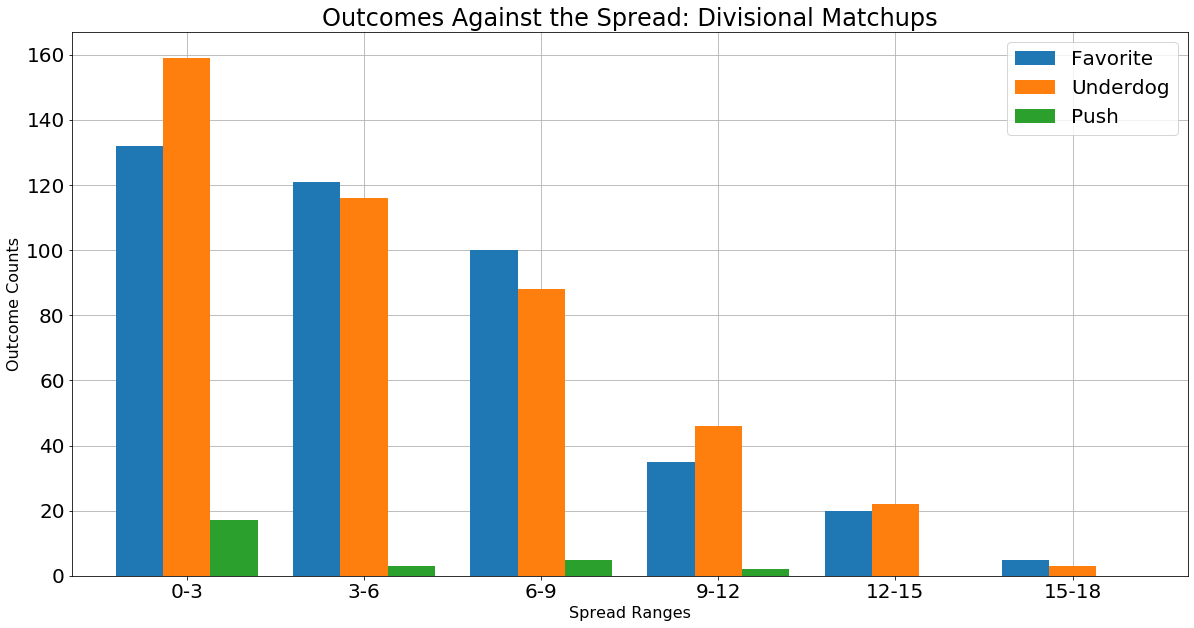

In [15]:
# The most legwork- I'm positive theres an easier way to do this but oh well its over now
# Create counts of spread outcomes in each range and calculate the percentages
a = ((divisional_df['Spread Range']=='0-3') & (divisional_df['Spread Outcome']=='DOG')).value_counts().values[1]
b = ((divisional_df['Spread Range']=='0-3') & (divisional_df['Spread Outcome']=='FAV')).value_counts().values[1]
c = ((divisional_df['Spread Range']=='0-3') & (divisional_df['Spread Outcome']=='PUSH')).value_counts().values[1]
dogpercentfirst = '{0:.2f}%'.format((a/(a+b+c))*100)
favpercentfirst = '{0:.2f}%'.format((b/(a+b+c))*100)
pushpercentfirst = '{0:.2f}%'.format((c/(a+b+c))*100)

d = ((divisional_df['Spread Range']=='3-6') & (divisional_df['Spread Outcome']=='DOG')).value_counts().values[1]
e = ((divisional_df['Spread Range']=='3-6') & (divisional_df['Spread Outcome']=='FAV')).value_counts().values[1]
f = ((divisional_df['Spread Range']=='3-6') & (divisional_df['Spread Outcome']=='PUSH')).value_counts().values[1]
dogpercentsecond = '{0:.2f}%'.format((d/(d+e+f))*100)
favpercentsecond = '{0:.2f}%'.format((e/(d+e+f))*100)
pushpercentsecond = '{0:.2f}%'.format((f/(d+e+f))*100)

g = ((divisional_df['Spread Range']=='6-9') & (divisional_df['Spread Outcome']=='DOG')).value_counts().values[1]
h = ((divisional_df['Spread Range']=='6-9') & (divisional_df['Spread Outcome']=='FAV')).value_counts().values[1]
i = ((divisional_df['Spread Range']=='6-9') & (divisional_df['Spread Outcome']=='PUSH')).value_counts().values[1]
dogpercentthird = '{0:.2f}%'.format((g/(g+h+i))*100)
favpercentthird = '{0:.2f}%'.format((h/(g+h+i))*100)
pushpercentthird = '{0:.2f}%'.format((i/(g+h+i))*100)
                                    
j = ((divisional_df['Spread Range']=='9-12') & (divisional_df['Spread Outcome']=='DOG')).value_counts().values[1]
k = ((divisional_df['Spread Range']=='9-12') & (divisional_df['Spread Outcome']=='FAV')).value_counts().values[1]
l = ((divisional_df['Spread Range']=='9-12') & (divisional_df['Spread Outcome']=='PUSH')).value_counts().values[1]
dogpercentfourth = '{0:.2f}%'.format((j/(j+k+l))*100)
favpercentfourth = '{0:.2f}%'.format((k/(j+k+l))*100)
pushpercentfourth = '{0:.2f}%'.format((l/(j+k+l))*100)
                                
m = ((divisional_df['Spread Range']=='12-15') & (divisional_df['Spread Outcome']=='DOG')).value_counts().values[1]
n = ((divisional_df['Spread Range']=='12-15') & (divisional_df['Spread Outcome']=='FAV')).value_counts().values[1]
o = 0 #No true values for 12-15 pushes
dogpercentfifth = '{0:.2f}%'.format((m/(m+n+o))*100)
favpercentfifth = '{0:.2f}%'.format((n/(m+n+0))*100)
                                
p = ((divisional_df['Spread Range']=='15-18') & (divisional_df['Spread Outcome']=='DOG')).value_counts().values[1]
q = ((divisional_df['Spread Range']=='15-18') & (divisional_df['Spread Outcome']=='FAV')).value_counts().values[1]
r = 0 #No true values for 15-18 pushes
dogpercentsixth = '{0:.2f}%'.format((p/(p+q+r))*100)
favpercentsixth = '{0:.2f}%'.format((q/(p+q+r))*100)


# Create barchart to illustrate
favorite = [b,e,h,k,n,q]
underdog = [a,d,g,j,m,p]
push = [c,f,i,l,o,r]

index = ['0-3', '3-6', '6-9',
         '9-12', '12-15', '15-18']
df = pd.DataFrame({'Favorite': favorite,
                   'Underdog': underdog,
                   'Push': push}, index=index)
                                
ax = df.plot.bar(figsize=(20,10), rot=0, zorder=3, fontsize=20, width=0.8)
ax.set_ylabel("Outcome Counts", fontsize=16)
ax.set_xlabel("Spread Ranges", fontsize=16)
ax.grid(zorder=0)
plt.title("Outcomes Against the Spread: Divisional Matchups", fontsize=24) 
plt.legend(fontsize=20)

In [16]:
# Same process now, only applied to over/under totals
# Function to determine barchart columns and total spreads
def binned_totals(row):
    if 30 <= row['Over/Under'] <= 34.5:
        return "30-35"
    if 35 <= row['Over/Under'] <= 39.5:
        return "35-40"
    if 40 <= row['Over/Under'] <= 44.5:
        return "40-45"
    if 45 <= row['Over/Under'] <= 49.5:
        return "45-50"
    if 50 <= row['Over/Under'] <= 54.5:
        return "50-55"
    if 55 <= row['Over/Under'] <= 59.5:
        return "55-60"
    if 60 <= row['Over/Under'] <= 65:
        return "60-65"

divisional_df['Over/Under Range'] = divisional_df.apply(binned_totals, 1)
divisional_df.head()

C:\Users\marcg\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Season,Week,Playoff Game,Home Team,Home Final,True Spread,Away Final,Away Team,Favorite,Spread,Over/Under,Total,Spread Outcome,Total Outcome,Divisional Matchup,Spread Range,Over/Under Range
1,9/12/2010,2010,1,False,BUF,10,2.0,15,MIA,MIA,-3.0,39.0,25,FAV,UNDER,True,0-3,35-40
2,9/12/2010,2010,1,False,CHI,19,-1.5,14,DET,CHI,-6.5,45.0,33,DOG,UNDER,True,6-9,45-50
3,9/12/2010,2010,1,False,HOU,34,-11.0,24,IND,IND,-1.0,48.0,58,DOG,OVER,True,0-3,45-50
9,9/12/2010,2010,1,False,SEA,31,-28.0,6,SF,SF,-3.0,37.0,37,DOG,PUSH,True,0-3,35-40
10,9/12/2010,2010,1,False,LAR,13,1.0,17,ARI,ARI,-3.0,39.5,30,FAV,UNDER,True,0-3,35-40


56.35%
42.33%
1.32%


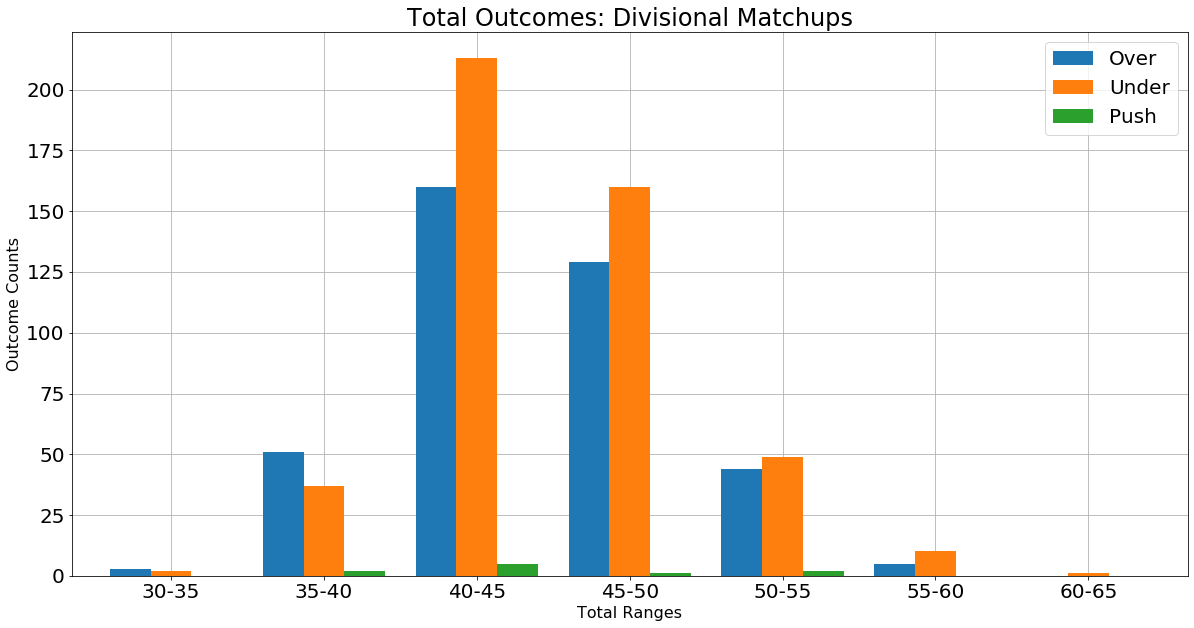

In [18]:
# Again, tedious but it worked
# Create counts of total outcomes in each total outcome spread and calculate percentage of those outcomes 
aa = ((divisional_df['Over/Under Range']=='30-35') & (divisional_df['Total Outcome']=='UNDER')).value_counts().values[1]
bb = ((divisional_df['Over/Under Range']=='30-35') & (divisional_df['Total Outcome']=='OVER')).value_counts().values[1]
cc = 0 #No true values for 30-35 pushes
under_percent_first = '{0:.2f}%'.format((aa/(aa+bb+cc))*100)
over_percent_first = '{0:.2f}%'.format((bb/(aa+bb+cc))*100)
push_percent_first = '{0:.2f}%'.format((cc/(aa+bb+cc))*100)

dd = ((divisional_df['Over/Under Range']=='35-40') & (divisional_df['Total Outcome']=='UNDER')).value_counts().values[1]
ee = ((divisional_df['Over/Under Range']=='35-40') & (divisional_df['Total Outcome']=='OVER')).value_counts().values[1]
ff = ((divisional_df['Over/Under Range']=='35-40') & (divisional_df['Total Outcome']=='PUSH')).value_counts().values[1]
under_percent_second = '{0:.2f}%'.format((dd/(dd+ee+ff))*100)
over_percent_second = '{0:.2f}%'.format((ee/(dd+ee+ff))*100)
push_percent_second = '{0:.2f}%'.format((ff/(dd+ee+ff))*100)

gg = ((divisional_df['Over/Under Range']=='40-45') & (divisional_df['Total Outcome']=='UNDER')).value_counts().values[1]
hh = ((divisional_df['Over/Under Range']=='40-45') & (divisional_df['Total Outcome']=='OVER')).value_counts().values[1]
ii = ((divisional_df['Over/Under Range']=='40-45') & (divisional_df['Total Outcome']=='PUSH')).value_counts().values[1]
under_percent_third = '{0:.2f}%'.format((gg/(gg+hh+ii))*100)
over_percent_third = '{0:.2f}%'.format((hh/(gg+hh+ii))*100)
push_percent_third = '{0:.2f}%'.format((ii/(gg+hh+ii))*100)
                                    
jj = ((divisional_df['Over/Under Range']=='45-50') & (divisional_df['Total Outcome']=='UNDER')).value_counts().values[1]
kk = ((divisional_df['Over/Under Range']=='45-50') & (divisional_df['Total Outcome']=='OVER')).value_counts().values[1]
ll = ((divisional_df['Over/Under Range']=='45-50') & (divisional_df['Total Outcome']=='PUSH')).value_counts().values[1]
under_percent_fourth = '{0:.2f}%'.format((jj/(jj+kk+ll))*100)
over_percent_fourth = '{0:.2f}%'.format((kk/(jj+kk+ll))*100)
push_percent_fourth = '{0:.2f}%'.format((ll/(jj+kk+ll))*100)
                                
mm = ((divisional_df['Over/Under Range']=='50-55') & (divisional_df['Total Outcome']=='UNDER')).value_counts().values[1]
nn = ((divisional_df['Over/Under Range']=='50-55') & (divisional_df['Total Outcome']=='OVER')).value_counts().values[1]
oo = ((divisional_df['Over/Under Range']=='50-55') & (divisional_df['Total Outcome']=='PUSH')).value_counts().values[1]
under_percent_fifth = '{0:.2f}%'.format((mm/(mm+nn+oo))*100)
over_percent_fifth = '{0:.2f}%'.format((nn/(mm+nn+oo))*100)
push_percent_fifth = '{0:.2f}%'.format((oo/(mm+nn+oo))*100)
                                
pp = ((divisional_df['Over/Under Range']=='55-60') & (divisional_df['Total Outcome']=='UNDER')).value_counts().values[1]
qq = ((divisional_df['Over/Under Range']=='55-60') & (divisional_df['Total Outcome']=='OVER')).value_counts().values[1]
rr = 0 #No true values for 55-60 pushes
under_percent_sixth = '{0:.2f}%'.format((pp/(pp+qq+rr))*100)
over_percent_sixth = '{0:.2f}%'.format((qq/(pp+qq+rr))*100)
push_percent_sixth = '{0:.2f}%'.format((rr/(pp+qq+rr))*100)

ss = ((divisional_df['Over/Under Range']=='60-65') & (divisional_df['Total Outcome']=='UNDER')).value_counts().values[1]
tt = 0 #No true values for overs in 60-65 range
uu = 0 #No true values for 60-65 pushes
under_percent_seventh = '{0:.2f}%'.format((ss/(ss+tt+uu))*100)
over_percent_seventh = '{0:.2f}%'.format((tt/(ss+tt+uu))*100)
push_percent_seventh = '{0:.2f}%'.format((uu/(ss+tt+uu))*100)

over = [bb,ee,hh,kk,nn,qq,tt]
under = [aa,dd,gg,jj,mm,pp,ss]
push_total = [cc,ff,ii,ll,oo,rr,uu]

index_total = ['30-35', '35-40', '40-45',
         '45-50', '50-55', '55-60','60-65']
total_df = pd.DataFrame({'Over': over,
                   'Under': under,
                   'Push': push_total}, index=index_total)
                                
ax2 = total_df.plot.bar(figsize=(20,10), rot=0, zorder=3, fontsize=20, width=0.8)
ax2.set_ylabel("Outcome Counts", fontsize=16)
ax2.set_xlabel("Total Ranges", fontsize=16)
ax2.grid(zorder=0)
plt.title("Total Outcomes: Divisional Matchups", fontsize=24)
plt.legend(fontsize=20)
print(under_percent_third)
print(over_percent_third)
print(push_percent_third)

In [76]:
# End of Divisional Analysis